In [6]:
# Mengimpor pustaka yang diperlukan
import numpy as np
import matplotlib.pyplot as plt

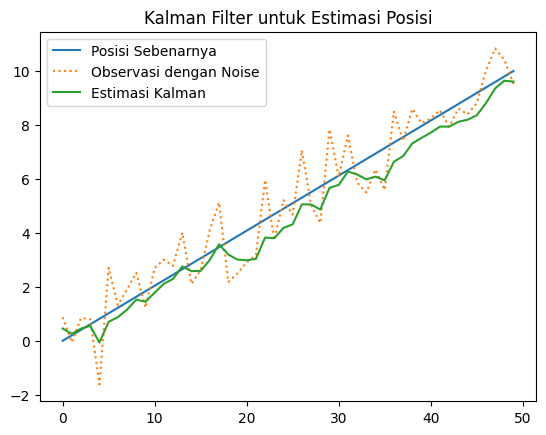


Analisis:
Program ini mengimplementasikan Kalman Filter untuk estimasi posisi robot dengan menggunakan observasi yang terkontaminasi noise.
Fungsi Kalman Filter terdiri dari dua langkah utama, yaitu prediksi dan update. Pada langkah prediksi, posisi robot diprediksi berdasarkan posisi sebelumnya dan ketidakpastian proses.
Pada langkah update, posisi estimasi diperbarui dengan informasi baru dari observasi yang terkontaminasi noise menggunakan Kalman Gain.
Dengan melakukan hal ini secara iteratif, estimasi posisi robot menjadi lebih akurat meskipun terdapat noise pada observasi.
Hasil yang ditampilkan menunjukkan perbandingan antara posisi sebenarnya, observasi yang terkontaminasi noise, dan estimasi Kalman.


In [12]:
# 1. Implementasi Kalman Filter untuk Estimasi Posisi Robot
# Inisialisasi variabel
num_steps = 50
actual_position = np.linspace(0, 10, num_steps)  # Posisi sebenarnya (untuk simulasi)
observations = actual_position + np.random.normal(0, 1, num_steps)  # Observasi dengan noise

# Variabel Kalman Filter
estimated_position = []
estimate = 0
estimate_uncertainty = 1
measurement_uncertainty = 1
process_uncertainty = 0.1

# Loop Kalman Filter
for i in range(num_steps):
    # Langkah prediksi
    estimate_uncertainty += process_uncertainty

    # Langkah update
    kalman_gain = estimate_uncertainty / (estimate_uncertainty + measurement_uncertainty)
    estimate = estimate + kalman_gain * (observations[i] - estimate)
    estimate_uncertainty = (1 - kalman_gain) * estimate_uncertainty

    estimated_position.append(estimate)

# Plot hasil
plt.figure()
plt.plot(actual_position, label='Posisi Sebenarnya')
plt.plot(observations, label='Observasi dengan Noise', linestyle='dotted')
plt.plot(estimated_position, label='Estimasi Kalman')
plt.legend()
plt.title('Kalman Filter untuk Estimasi Posisi')
plt.show()

# Analisis
print("\nAnalisis:")
print("Program ini mengimplementasikan Kalman Filter untuk estimasi posisi robot dengan menggunakan observasi yang terkontaminasi noise.")
print("Fungsi Kalman Filter terdiri dari dua langkah utama, yaitu prediksi dan update. Pada langkah prediksi, posisi robot diprediksi berdasarkan posisi sebelumnya dan ketidakpastian proses.")
print("Pada langkah update, posisi estimasi diperbarui dengan informasi baru dari observasi yang terkontaminasi noise menggunakan Kalman Gain.")
print("Dengan melakukan hal ini secara iteratif, estimasi posisi robot menjadi lebih akurat meskipun terdapat noise pada observasi.")
print("Hasil yang ditampilkan menunjukkan perbandingan antara posisi sebenarnya, observasi yang terkontaminasi noise, dan estimasi Kalman.")

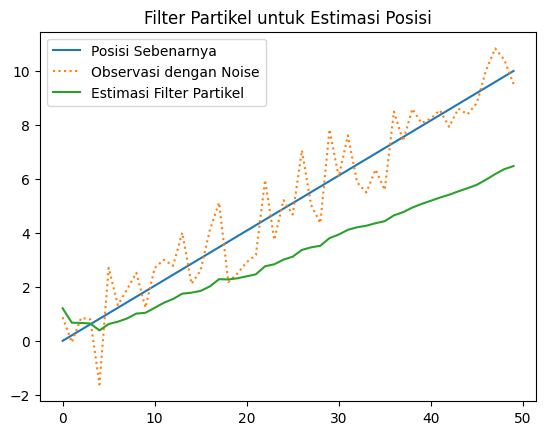


Analisis:
Program ini mengimplementasikan Filter Partikel untuk estimasi posisi robot dengan menggunakan observasi yang terkontaminasi noise.
Filter Partikel adalah metode Monte Carlo yang menggunakan banyak partikel untuk mendekati distribusi posisi robot yang sesungguhnya.
Proses filter dimulai dengan inisialisasi partikel acak di seluruh ruang posisi dan memberikan bobot yang sama untuk setiap partikel.
Setiap iterasi melibatkan dua langkah utama: prediksi (di mana noise ditambahkan pada posisi partikel) dan update (di mana bobot partikel diperbarui berdasarkan jarak antara partikel dan observasi).
Setelah update, dilakukan resampling untuk memilih partikel yang lebih sesuai dengan observasi, dan akhirnya estimasi posisi dihitung sebagai rata-rata dari posisi partikel.
Hasil yang ditampilkan menunjukkan perbandingan antara posisi sebenarnya, observasi yang terkontaminasi noise, dan estimasi menggunakan Filter Partik.


In [13]:
# 2. Filter Partikel untuk Estimasi Posisi Robot
def particle_filter(observations, num_particles=1000):
    particles = np.random.uniform(0, 10, num_particles)  # Inisialisasi partikel
    weights = np.ones(num_particles) / num_particles  # Bobot awal sama rata

    estimates = []
    for obs in observations:
        # Langkah prediksi (menambahkan noise pada partikel)
        particles += np.random.normal(0, 0.1, num_particles)

        # Update bobot berdasarkan observasi
        weights *= np.exp(-0.5 * ((particles - obs) ** 2))
        weights /= np.sum(weights)

        # Resampling partikel berdasarkan bobot
        indices = np.random.choice(range(num_particles), num_particles, p=weights)
        particles = particles[indices]
        weights = np.ones(num_particles) / num_particles

        # Estimasi posisi sebagai rata-rata partikel
        estimates.append(np.mean(particles))

    return estimates

# Jalankan filter partikel dan plot
particle_estimates = particle_filter(observations)
plt.figure()
plt.plot(actual_position, label='Posisi Sebenarnya')
plt.plot(observations, label='Observasi dengan Noise', linestyle='dotted')
plt.plot(particle_estimates, label='Estimasi Filter Partikel')
plt.legend()
plt.title('Filter Partikel untuk Estimasi Posisi')
plt.show()

# Analisis
print("\nAnalisis:")
print("Program ini mengimplementasikan Filter Partikel untuk estimasi posisi robot dengan menggunakan observasi yang terkontaminasi noise.")
print("Filter Partikel adalah metode Monte Carlo yang menggunakan banyak partikel untuk mendekati distribusi posisi robot yang sesungguhnya.")
print("Proses filter dimulai dengan inisialisasi partikel acak di seluruh ruang posisi dan memberikan bobot yang sama untuk setiap partikel.")
print("Setiap iterasi melibatkan dua langkah utama: prediksi (di mana noise ditambahkan pada posisi partikel) dan update (di mana bobot partikel diperbarui berdasarkan jarak antara partikel dan observasi).")
print("Setelah update, dilakukan resampling untuk memilih partikel yang lebih sesuai dengan observasi, dan akhirnya estimasi posisi dihitung sebagai rata-rata dari posisi partikel.")
print("Hasil yang ditampilkan menunjukkan perbandingan antara posisi sebenarnya, observasi yang terkontaminasi noise, dan estimasi menggunakan Filter Partik.")

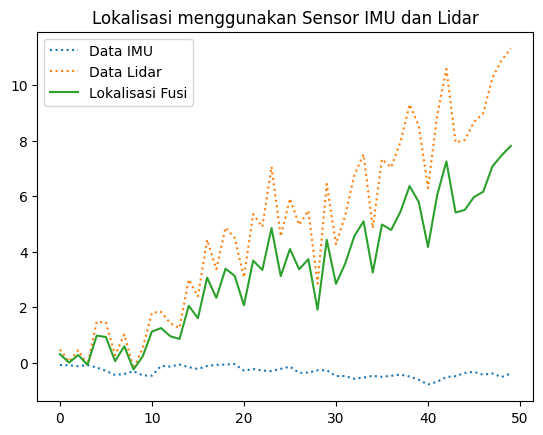


Analisis:
Program ini mengimplementasikan fusi data antara sensor IMU dan Lidar untuk lokalisasi robot.
Data IMU dihasilkan dengan penjumlahan kumulatif noise, sementara data Lidar menggunakan linieritas dengan penambahan noise.
Fusi data dilakukan dengan memberikan bobot lebih pada data Lidar (70%) dibandingkan dengan data IMU (30%), karena Lidar umumnya lebih akurat dalam pengukuran posisi.
Hasil yang ditampilkan menunjukkan perbandingan antara data IMU, data Lidar, dan hasil lokalisasi yang dihasilkan dari fusi kedua sensor tersebut.
Fusi data ini memungkinkan peningkatan akurasi dalam estimasi posisi robot, memanfaatkan kelebihan dari masing-masing sensor.


In [14]:
# 3. Lokalisasi dengan IMU dan Lidar
def imu_lidar_localization(num_steps):
    imu_data = np.cumsum(np.random.normal(0, 0.1, num_steps))  # Data IMU simulasi
    lidar_data = np.linspace(0, 10, num_steps) + np.random.normal(0, 1, num_steps)  # Data Lidar simulasi

    # Fusi data IMU dan Lidar (rata-rata berbobot)
    localization = 0.7 * lidar_data + 0.3 * imu_data

    return imu_data, lidar_data, localization

imu, lidar, fused = imu_lidar_localization(num_steps)
plt.figure()
plt.plot(imu, label='Data IMU', linestyle='dotted')
plt.plot(lidar, label='Data Lidar', linestyle='dotted')
plt.plot(fused, label='Lokalisasi Fusi')
plt.legend()
plt.title('Lokalisasi menggunakan Sensor IMU dan Lidar')
plt.show()

# Analisis
print("\nAnalisis:")
print("Program ini mengimplementasikan fusi data antara sensor IMU dan Lidar untuk lokalisasi robot.")
print("Data IMU dihasilkan dengan penjumlahan kumulatif noise, sementara data Lidar menggunakan linieritas dengan penambahan noise.")
print("Fusi data dilakukan dengan memberikan bobot lebih pada data Lidar (70%) dibandingkan dengan data IMU (30%), karena Lidar umumnya lebih akurat dalam pengukuran posisi.")
print("Hasil yang ditampilkan menunjukkan perbandingan antara data IMU, data Lidar, dan hasil lokalisasi yang dihasilkan dari fusi kedua sensor tersebut.")
print("Fusi data ini memungkinkan peningkatan akurasi dalam estimasi posisi robot, memanfaatkan kelebihan dari masing-masing sensor.")

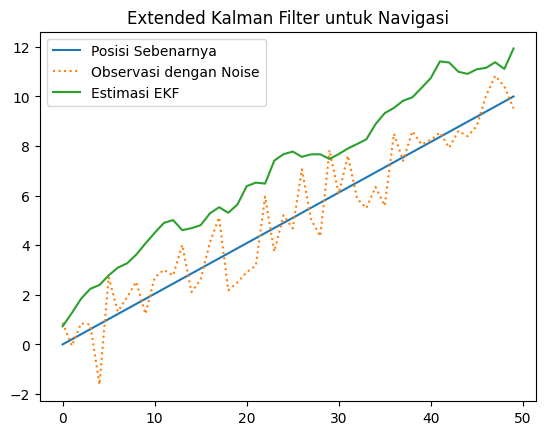


Analisis:
Program ini mengimplementasikan Extended Kalman Filter (EKF) untuk navigasi, yang digunakan untuk memperkirakan posisi robot.
Extended Kalman Filter (EKF) digunakan untuk model non-linear yang memerlukan update prediksi dan observasi secara iteratif.
Pada setiap langkah, filter ini memperbarui posisi dan kecepatan robot berdasarkan observasi yang tercemar noise.
Langkah prediksi menggunakan kecepatan untuk memperbarui posisi robot, sedangkan langkah update menggunakan observasi posisi untuk memperbaiki estimasi.
Hasil yang ditampilkan menunjukkan estimasi posisi berdasarkan EKF dibandingkan dengan posisi sebenarnya dan observasi dengan noise.
Dengan menggunakan EKF, estimasi posisi menjadi lebih stabil meskipun ada noise pada observasi.


In [15]:
# 4. Extended Kalman Filter (EKF) untuk Navigasi
def ekf_navigation(num_steps):
    # Vektor keadaan: [posisi, kecepatan]
    state = np.array([0, 1])  # Posisi dan kecepatan awal
    state_uncertainty = np.eye(2)

    # Observasi simulasi (posisi)
    observations = np.linspace(0, 10, num_steps) + np.random.normal(0, 1, num_steps)

    states = []
    for obs in observations:
        # Langkah prediksi
        state = np.array([state[0] + state[1], state[1]])  # Update posisi dan kecepatan
        state_uncertainty += np.eye(2) * 0.1  # Noise proses

        # Langkah update
        kalman_gain = state_uncertainty @ np.array([[1], [0]]) / (state_uncertainty[0, 0] + 1)
        state = state + kalman_gain.flatten() * (obs - state[0])
        state_uncertainty = (np.eye(2) - kalman_gain @ np.array([[1, 0]])) @ state_uncertainty

        states.append(state[0])

    return states

# Jalankan EKF dan plot
ekf_states = ekf_navigation(num_steps)
plt.figure()
plt.plot(actual_position, label='Posisi Sebenarnya')
plt.plot(observations, label='Observasi dengan Noise', linestyle='dotted')
plt.plot(ekf_states, label='Estimasi EKF')
plt.legend()
plt.title('Extended Kalman Filter untuk Navigasi')
plt.show()

# Analisis
print("\nAnalisis:")
print("Program ini mengimplementasikan Extended Kalman Filter (EKF) untuk navigasi, yang digunakan untuk memperkirakan posisi robot.")
print("Extended Kalman Filter (EKF) digunakan untuk model non-linear yang memerlukan update prediksi dan observasi secara iteratif.")
print("Pada setiap langkah, filter ini memperbarui posisi dan kecepatan robot berdasarkan observasi yang tercemar noise.")
print("Langkah prediksi menggunakan kecepatan untuk memperbarui posisi robot, sedangkan langkah update menggunakan observasi posisi untuk memperbaiki estimasi.")
print("Hasil yang ditampilkan menunjukkan estimasi posisi berdasarkan EKF dibandingkan dengan posisi sebenarnya dan observasi dengan noise.")
print("Dengan menggunakan EKF, estimasi posisi menjadi lebih stabil meskipun ada noise pada observasi.")

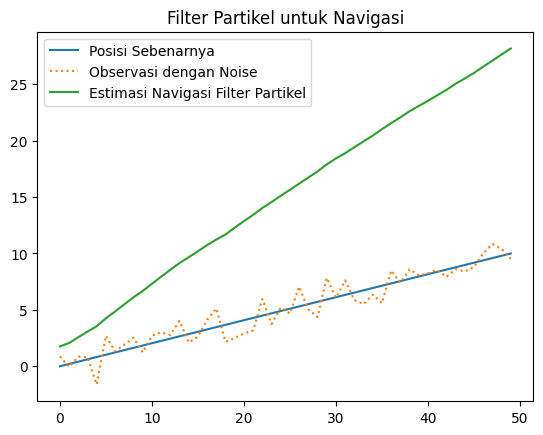


Analisis:
Program ini mengimplementasikan Filter Partikel untuk navigasi, yang menggunakan serangkaian partikel untuk memperkirakan posisi robot.
Pada setiap langkah, filter ini memperbarui posisi partikel berdasarkan kecepatan dan menambahkan noise untuk simulasi pergerakan.
Bobot partikel diperbarui berdasarkan perbedaan antara posisi partikel dan observasi yang diperoleh. Kemudian, dilakukan resampling untuk memilih partikel-partikel terbaik.
Hasil yang ditampilkan menunjukkan estimasi posisi yang dihitung dengan Filter Partikel, dibandingkan dengan posisi sebenarnya dan observasi yang tercemar noise.
Filter Partikel memberikan estimasi posisi yang akurat dengan mempertimbangkan distribusi partikel berdasarkan bobot yang dihasilkan oleh observasi.
Metode ini sangat berguna untuk aplikasi navigasi di mana model dinamis atau sensor tidak sempurna.


In [16]:
# 5. Filter Partikel untuk Navigasi
def particle_filter_navigation(observations, num_particles=1000):
    particles = np.random.uniform(0, 10, num_particles)  # Inisialisasi partikel
    velocities = np.random.normal(1, 0.1, num_particles)  # Kecepatan awal
    weights = np.ones(num_particles) / num_particles  # Bobot awal sama rata

    estimates = []
    for obs in observations:
        # Langkah prediksi
        particles += velocities  # Update partikel berdasarkan kecepatan
        particles += np.random.normal(0, 0.1, num_particles)  # Tambah noise

        # Update bobot berdasarkan observasi
        weights *= np.exp(-0.5 * ((particles - obs) ** 2))
        weights /= np.sum(weights)

        # Resampling partikel berdasarkan bobot
        indices = np.random.choice(range(num_particles), num_particles, p=weights)
        particles = particles[indices]
        velocities = velocities[indices]
        weights = np.ones(num_particles) / num_particles

        # Estimasi posisi sebagai rata-rata partikel
        estimates.append(np.mean(particles))

    return estimates

# Jalankan filter partikel untuk navigasi dan plot
particle_navigation_estimates = particle_filter_navigation(observations)
plt.figure()
plt.plot(actual_position, label='Posisi Sebenarnya')
plt.plot(observations, label='Observasi dengan Noise', linestyle='dotted')
plt.plot(particle_navigation_estimates, label='Estimasi Navigasi Filter Partikel')
plt.legend()
plt.title('Filter Partikel untuk Navigasi')
plt.show()

# Analisis
print("\nAnalisis:")
print("Program ini mengimplementasikan Filter Partikel untuk navigasi, yang menggunakan serangkaian partikel untuk memperkirakan posisi robot.")
print("Pada setiap langkah, filter ini memperbarui posisi partikel berdasarkan kecepatan dan menambahkan noise untuk simulasi pergerakan.")
print("Bobot partikel diperbarui berdasarkan perbedaan antara posisi partikel dan observasi yang diperoleh. Kemudian, dilakukan resampling untuk memilih partikel-partikel terbaik.")
print("Hasil yang ditampilkan menunjukkan estimasi posisi yang dihitung dengan Filter Partikel, dibandingkan dengan posisi sebenarnya dan observasi yang tercemar noise.")
print("Filter Partikel memberikan estimasi posisi yang akurat dengan mempertimbangkan distribusi partikel berdasarkan bobot yang dihasilkan oleh observasi.")
print("Metode ini sangat berguna untuk aplikasi navigasi di mana model dinamis atau sensor tidak sempurna.")